   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Informações gerais:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

Porcentagem de valores ausent

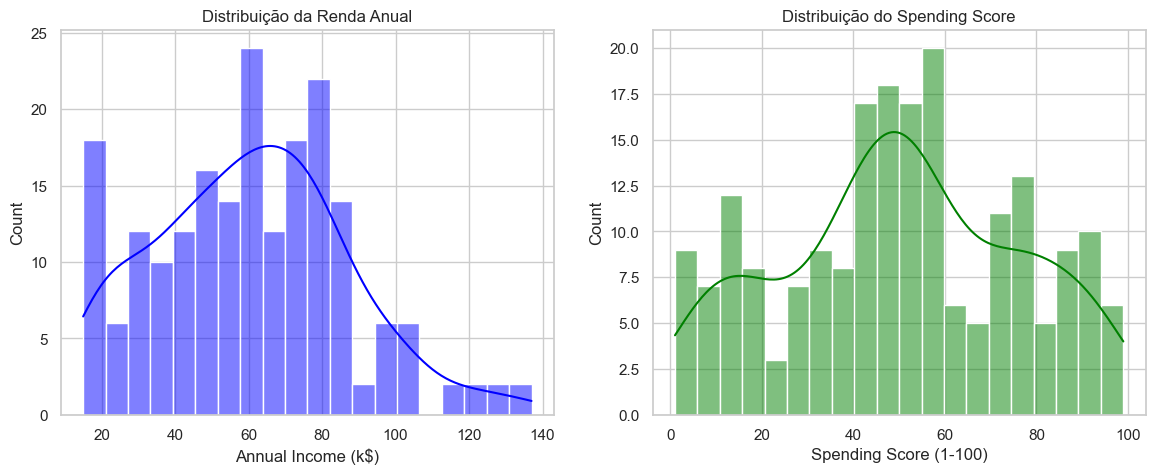

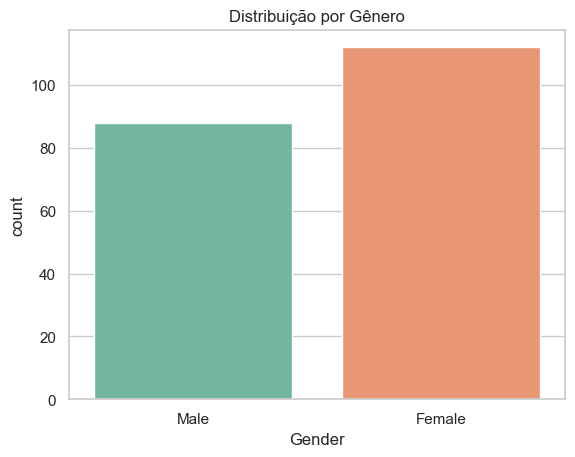

Variância explicada pelos 2 componentes principais: 59.92%


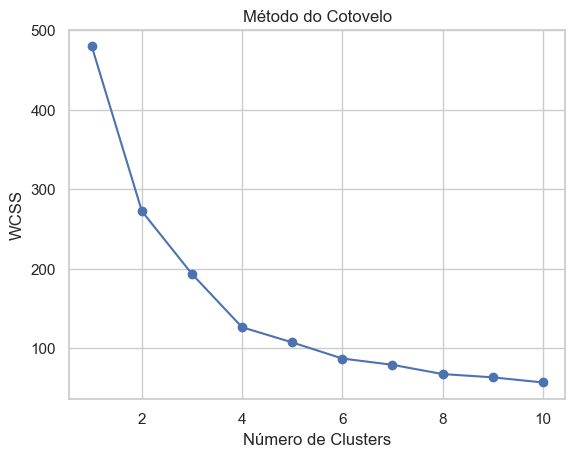

Silhouette Score: 0.4038


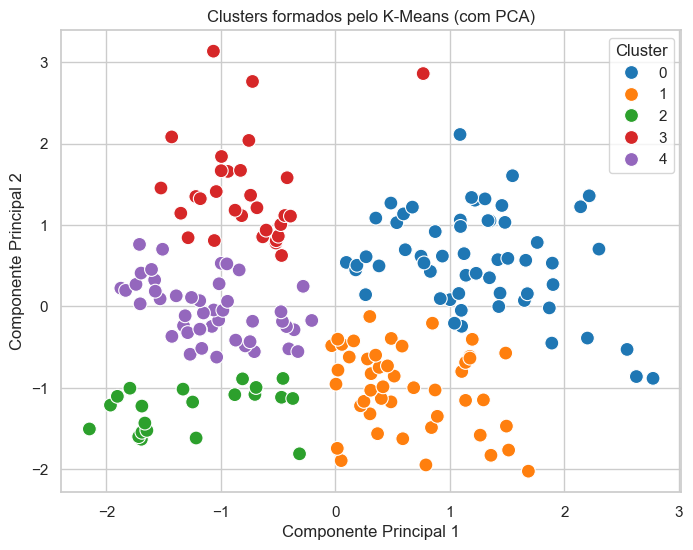


Resumo dos clusters:
          Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                  
0        49.2                70.2                    28.7
1        48.3                46.7                    37.3
2        27.1                30.8                    68.1
3        31.1                85.7                    72.8
4        27.0                59.7                    66.8


In [11]:

# Escolher o melhor número de clusters entre 2 e 4 com base no Silhouette Score
best_k = 2
best_score = -1

for k in range(2, 5):
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(df_pca)
    score = silhouette_score(df_pca, clusters)
    print(f'k={k} -> Silhouette Score: {score:.4f}')
    if score > best_score:
        best_score = score
        best_k = k

# Treinamento final com o melhor k
kmeans = KMeans(n_clusters=best_k, random_state=42)
clusters = kmeans.fit_predict(df_pca)
df['Cluster'] = clusters

print(f'\nMelhor número de clusters: {best_k} (Silhouette Score: {best_score:.4f})')
